<center><h1>Xie_Qinghui_HW2</h1></center>
<br>
<br>

Name: Hui Xie
<br>
Github Username: qxie44
<br>
USC ID: 7956658480

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Get the Cycle Power Plant Data Set

In [125]:
#Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), 
# Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)
aremData = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
aremData.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### (b) Exploring the data

#### i. rows and columns

In [126]:
print(aremData.shape)
print(aremData.columns)
print("The dataset has 9568 rows and 5 columns. The rows represent data points collected from a Combined Cycle Power Plant \n and the columns represent different features with PE as the energy output")

(9568, 5)
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
The dataset has 9568 rows and 5 columns. The rows represent data points collected from a Combined Cycle Power Plant 
 and the columns represent different features with PE as the energy output


#### ii. pairwise scatterplots of all the varianbles

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

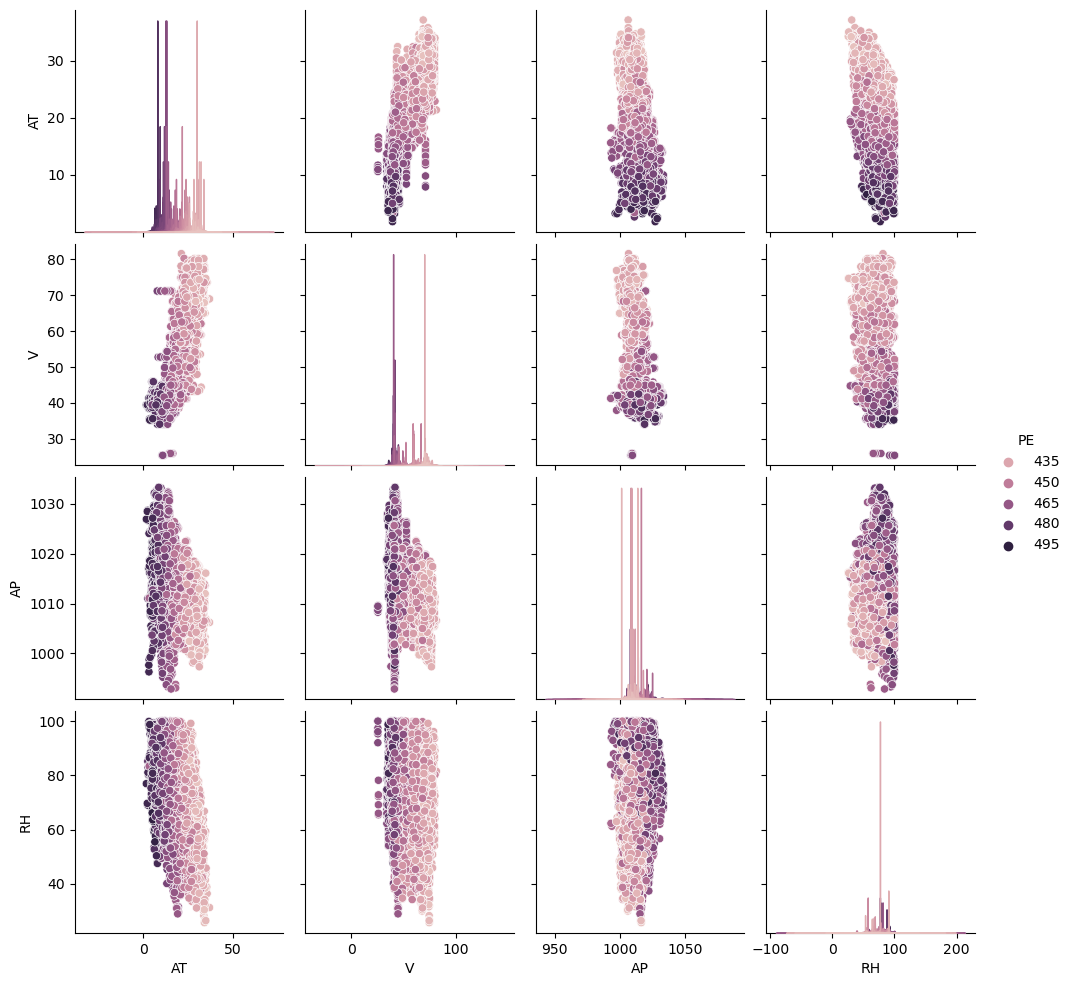

In [127]:
sns.pairplot(aremData, hue = 'PE',diag_kind='kde')

For all of the pairplots, there appears to be a slight positive relationship with AT and V.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [128]:
aMean = aremData.mean()
aMedian = aremData.median()
aRange = aremData.max() - aremData.min()
aQ1 = aremData.quantile(0.25)
aQ3 = aremData.quantile(0.75)
aremTable = pd.DataFrame({
    'Mean': aMean,
    'Median': aMedian,
    'Range': aRange,
    'First Quartile': aQ1,
    'Third Quartile': aQ3,
    'Interquartile Range': aQ3 - aQ1
})
display(aremTable)


,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Range
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

In [129]:
#Chatgpt: "fitting linear regression loop"
independent = ['AT', 'V', 'AP', 'RH'] 
dependent = 'PE'
summary = {}
pVal = {}
uCoef = {}
for  i in independent:
    X = aremData[i]
    X = sm.add_constant(X)
    y = aremData[dependent]
    #fit model for the y and X declared above
    model = sm.OLS(y, X).fit()
    #store the model summary for that independent variable
    summary[i] = model.summary()
    print(model.summary())
    #store p values
    pVal[i] = model.pvalues[1]
    uCoef[i] = model.params[i]
    

#print p for each independent variable
for i, p in pVal.items():
    print(f"{i}: {p:.4f}")



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:10:05   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

/var/folders/n4/22323b5s04q10jyc3x2l4qz80000gn/T/ipykernel_27221/184608949.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pVal[i] = model.pvalues[1]
/var/folders/n4/22323b5s04q10jyc3x2l4qz80000gn/T/ipykernel_27221/184608949.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pVal[i] = model.pvalues[1]
/var/folders/n4/22323b5s04q10jyc3x2l4qz80000gn/T/ipykernel_27221/184608949.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


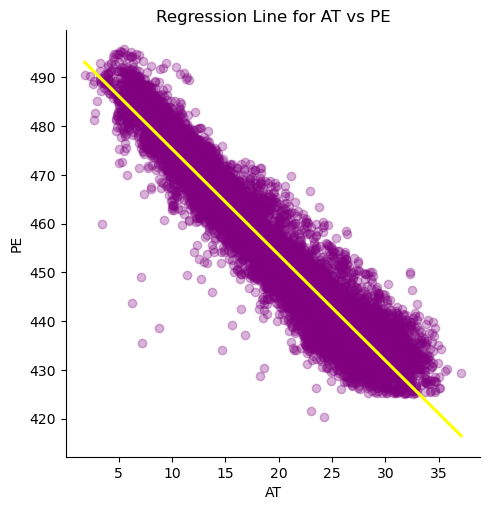

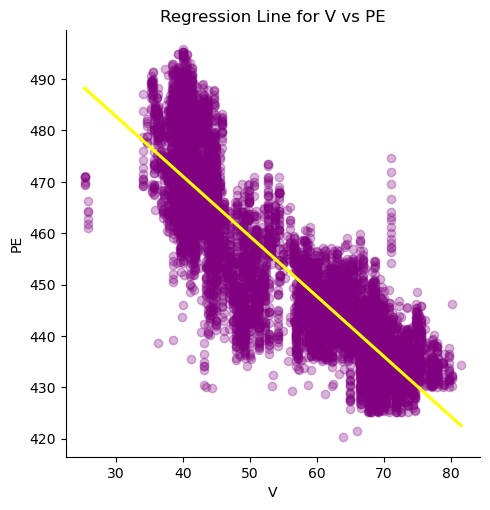

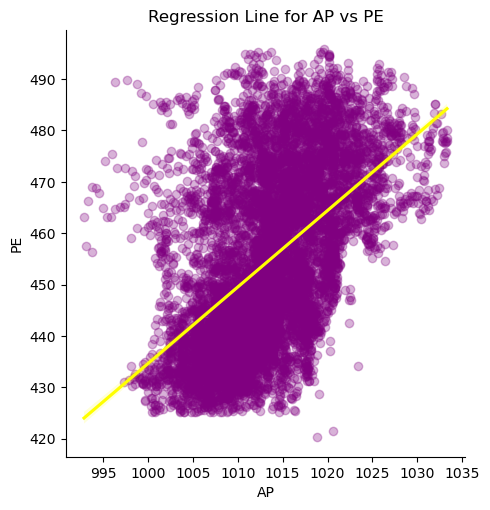

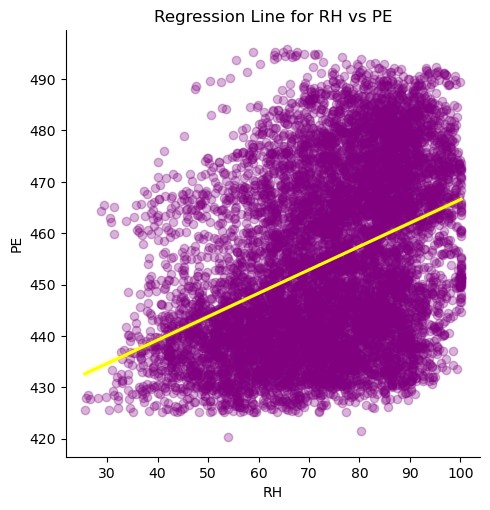

In [130]:
#chatgpt: "how to adjust density" : 'alpha' :.0.5
for i in independent:
    sns.lmplot(x=i, y=dependent, data=aremData, aspect=1, scatter_kws={'alpha': 0.3,'color': 'purple'}, 
           line_kws={'color': 'yellow'})
    plt.title(f'Regression Line for {i} vs {dependent}')
    plt.show()

In [132]:
#ChatGPT:"how to statistically calculate the outliers for each independent variable using IQR and boxplot"
outliers = {}
# Loop through each features
for var in independent:  
    # Calculate the 25th and 75th percentile
    Q1 = aremData[var].quantile(0.25)
    Q3 = aremData[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # counts outliers given feature
    outliers[var] = aremData[(aremData[var] < lower_bound) | (aremData[var] > upper_bound)]
    print(f'{var} - Outliers: {len(outliers[var])}')

AT - Outliers: 0
V - Outliers: 0
AP - Outliers: 88
RH - Outliers: 12


There appears to be outliers for the variables AP and RH, however, the P-values are still significant so I will be keeping them in the dataset.

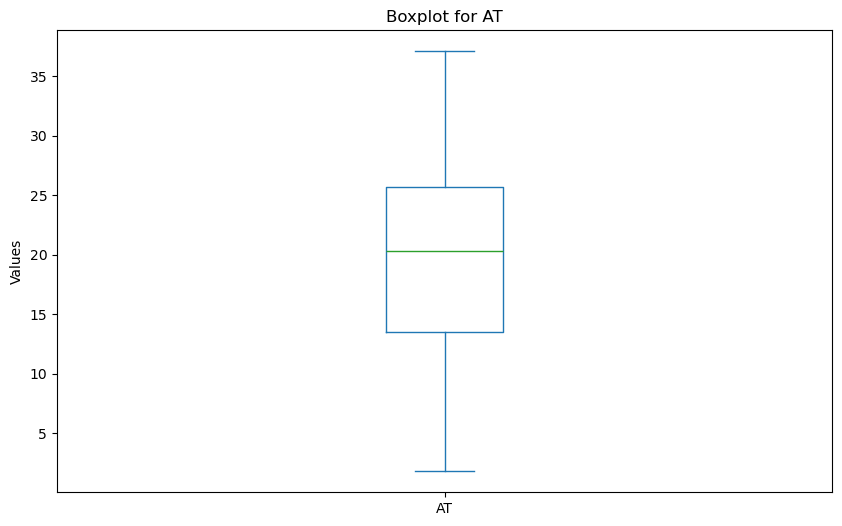

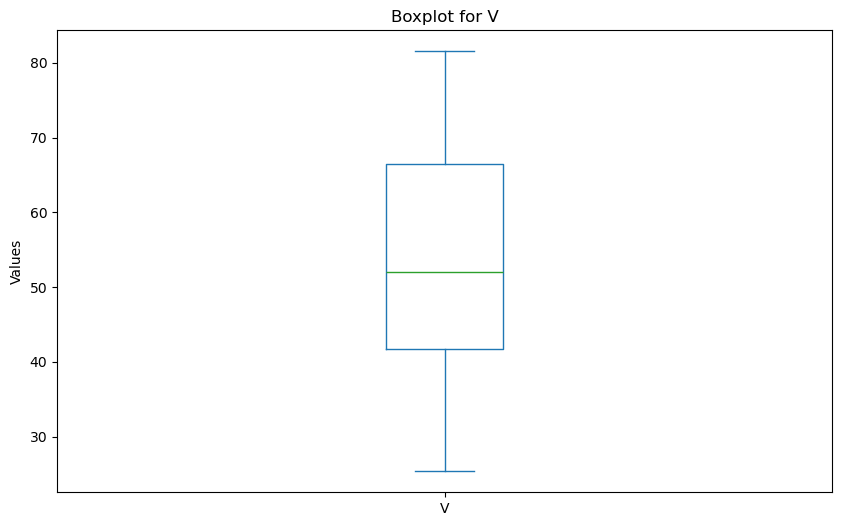

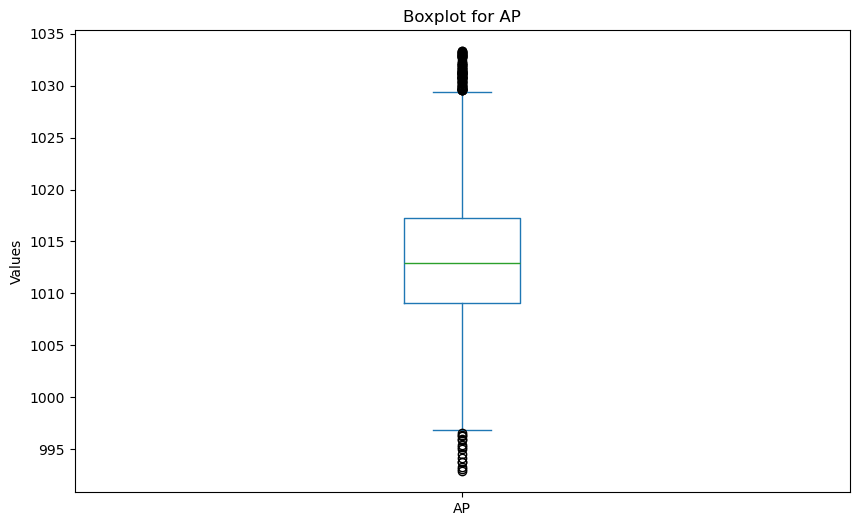

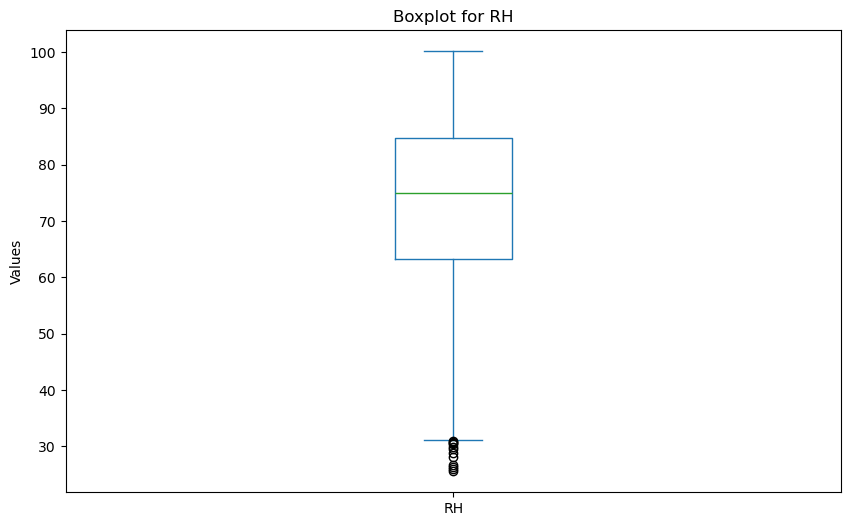

In [133]:
#graphing out the outliers using boxplot
for i in independent:
    plt.figure(figsize=(10, 6))
    aremData[i].plot(kind='box')
    plt.title(f'Boxplot for {i}')  
    plt.ylabel('Values')

### (d) Multiple Regression

In [134]:
predictors = aremData.drop(columns=['PE']) 
X = sm.add_constant(predictors) 
y = aremData['PE'] 

#multiple regression model
model = sm.OLS(y, X).fit()

# summary of model
model_summary = model.summary()
print(model_summary)
mCoef = model.params


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:10:08   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

The p-values for all independent variables were less than 0.000 therefore shows statistical signifance thus rejecting the null hypothesis.

### (e) 1c Compare to 1d

In [135]:
compareTable = pd.DataFrame({
    'Predictor': independent,
    'Univariate Coefficients': [uCoef[i] for i in independent],  # Extracting univariate coefficients
    'Multiple Coefficients': [mCoef[i] for i in independent]  # Extracting multiple regression coefficients
})
display(compareTable)

,Predictor,Univariate Coefficients,Multiple Coefficients
0,AT,-2.171320,-1.977513
1,V,-1.168135,-0.233916
2,AP,1.489872,0.062083
3,RH,0.455650,-0.158054


Text(0, 0.5, 'Multiple Coefficients')

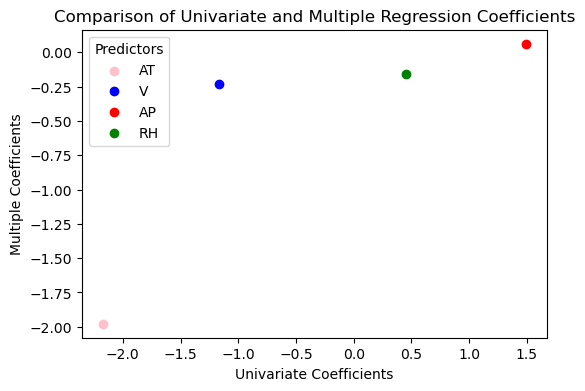

In [136]:
#x,y and color 
x_values = [uCoef[i] for i in independent]  
y_values = [mCoef[i] for i in independent]  
colors = ["pink", "blue", "red", "green"]
plt.figure(figsize=(6, 4))
for i, predictor in enumerate(independent):
    plt.scatter(x_values[i], y_values[i], color=colors[i], label=predictor)
plt.title('Comparison of Univariate and Multiple Regression Coefficients')
plt.legend(title='Predictors') 
plt.xlabel('Univariate Coefficients')
plt.ylabel('Multiple Coefficients')


### (f) Nonlinear Association

In [137]:
nonlinear = {}
for i in independent:
    X = aremData[i]

    # to go through all the polynomaials X, X^2, X^3
    #ChatGPT: how to add an intercept to the input feature
    X_poly = np.column_stack([X**r for r in range(1, 4)])  
    X_poly = sm.add_constant(X_poly) 

    y = aremData[dependent]
    model = sm.OLS(y, X_poly).fit()

    nonlinear[i] = {
        'summary': model.summary(),
        'coefficients': model.params,
        'p-values': model.pvalues
    }
    print(f"For {i}",model.summary())



For AT                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:10:09   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248  

All variables have a p-value lower than 0.05 except for the variable V. It has a p-value of 0.768 for $x^2$ which is higher than the 0.05 threshold.

### (g) Interactions of Predictors

In [167]:

#create interaction terms
#aremData['ATAP'] = aremData['AT'] * aremData['AP']
#aremData['ATRH'] = aremData['AT'] * aremData['RH']
#aremData['APRH'] = aremData['AP'] * aremData['RH']
#Combine original independent variables with interaction terms
#X = aremData[independent + ['ATAP', 'ATRH', 'APRH']]
#X = pd.concat([aremData[independent], interactionVar], axis=1)
#X = sm.add_constant(X)
#y = aremData[dependent]

# Fit model
model = smf.ols("PE ~ AT + V + AP + RH + AT*V + AT*AP + AT*RH + V*AP + V*RH + AP*RH", data=aremData).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:53:52   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

Most interaction terms are statistically significant except AT, AT:AP, and V:RH . AT has a p-value of 0.067, AT:AP has a p-value of 0.452 and V:RH has a p-value of  0.086 which are all greater than 0.05 thus failing to reject the null for those variables.

### (h) Improvement

In [139]:
#train on 70% of data, set random state to 444 for consistency
train, test = train_test_split(aremData, test_size=0.3, random_state=444)
#need to calculate all all possible interaction terms and quadratic nonlinearities
def allterms(data):
    #quadratic
    for var in independent:
        data[f'{var}^2'] = data[var] ** 2
    
    #interaction
    for i in range(len(independent)):
        for j in range(i + 1, len(independent)):
            var1 = independent[i]
            var2 = independent[j]
            data[f'{var1}_{var2}'] = data[var1] * data[var2]

    return data

test = allterms(test)
train = allterms(train)

Xtrain = train[independent]
ytrain = train[dependent]
Xtest = test[independent]
ytest = test[dependent]

#remove based on p significance
base = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()

sigVar = base.pvalues[base.pvalues < 0.05].index
sigVar = sigVar[sigVar != 'const'] #kept on erroring because of constant
XtrainSig = Xtrain[sigVar]
XtestSig = Xtest[sigVar]

sigModel = sm.OLS(ytrain, sm.add_constant(XtrainSig)).fit()

yPredtrain = sigModel.predict(sm.add_constant(XtrainSig))
yPredtest = sigModel.predict(sm.add_constant(XtestSig))

print(sigModel.summary())

trainMse = mean_squared_error(ytrain, yPredtrain)
testMse = mean_squared_error(ytest, yPredtest)



                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.204e+04
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:10:09   Log-Likelihood:                -19648.
No. Observations:                6697   AIC:                         3.931e+04
Df Residuals:                    6692   BIC:                         3.934e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.5726     11.535     39.667      0.0

In [140]:
print(f'Training MSE: {trainMse:.4f}')
print(f'Testing MSE: {testMse:.4f}')

Training MSE: 20.6935
Testing MSE: 20.9438


### (i) KNN

In [141]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [142]:
#Raw
trainError = []
testError = []
kVal = list(range(1, 101))

for k in kVal:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(Xtrain, ytrain)

    trainPred = knn.predict(Xtrain)
    testPred = knn.predict(Xtest)

    train_error = mean_squared_error(ytrain, trainPred)
    test_error = mean_squared_error(ytest, testPred)
    trainError.append(train_error)
    testError.append(test_error)



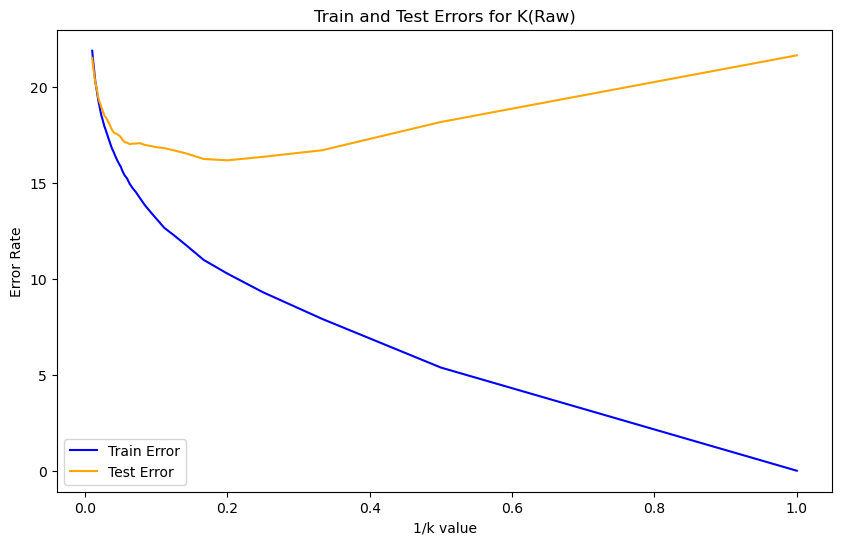

In [143]:
inv_kVal = [1/k for k in kVal]
plt.figure(figsize=(10, 6))
plt.plot(inv_kVal, trainError, label='Train Error', color='blue')
plt.plot(inv_kVal, testError, label='Test Error', color='orange')
plt.xlabel('1/k value')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors for K(Raw)')
plt.legend()

In [149]:
from sklearn.preprocessing import normalize

In [151]:
#normalized
XtrainN = normalize(Xtrain)
XtestN = normalize(Xtest)
trainErrorN = []
testErrorN = []


for k in kVal:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(XtrainN, ytrain)

    trainPred = knn.predict(XtrainN)
    testPred = knn.predict(XtestN)

    train_error = mean_squared_error(ytrain, trainPred)
    test_error = mean_squared_error(ytest, testPred)

    trainErrorN.append(train_error)
    testErrorN.append(test_error)

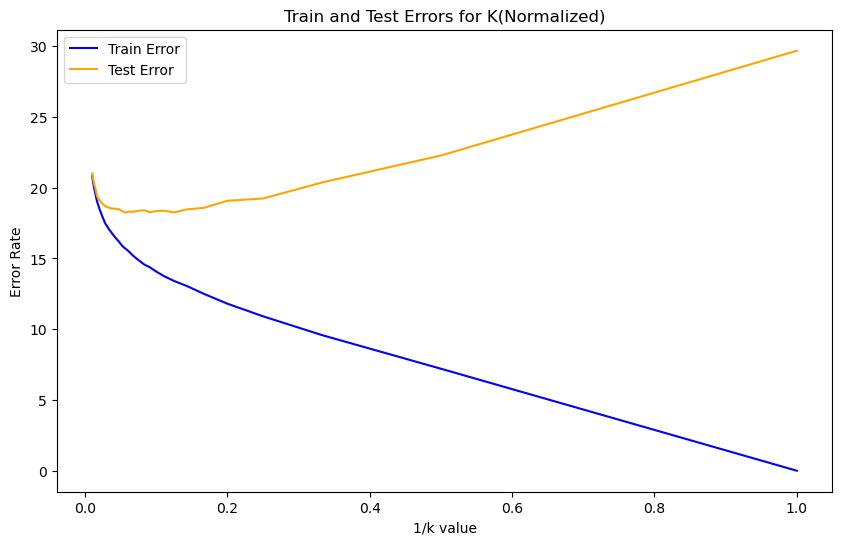

In [152]:
inv_kVal = [1/k for k in kVal]
plt.figure(figsize=(10, 6))
plt.plot(inv_kVal, trainErrorN, label='Train Error', color='blue')
plt.plot(inv_kVal, testErrorN, label='Test Error', color='orange')
plt.xlabel('1/k value')
plt.ylabel('Error Rate')
plt.title('Train and Test Errors for K(Normalized)')
plt.legend()

### (j ) Compare KNN and Linear

In [166]:
mseRaw = np.min(testError)
mseNorm= np.min(testErrorN)
table = pd.DataFrame({
    'Feature Type': ['KNN(Raw)', 'KNN(Normalized)', 'Linear(Significant)'],
    'Test MSE': [mseRaw, mseNorm, testMse]
})
display(table)

,Feature Type,Test MSE
0,KNN(Raw),16.192847
1,KNN(Normalized),18.249482
2,Linear(Significant),20.943834


Overall, it appears that the KNN has a better performance than the linear model. The MSE for both raw and normalized data is lower than the linear model. 

## 2. ISLR: 2.4.1

Indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method.

### (a) The sample size n is extremely large, and the number of predictors p is small.

If we have a large n and a small p, then the performance of a flexible statistical learning method would be better. Since there is a small p, a flexible model would prevent overfitting while still understanding the relationships of the sample. 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

If we have a small n and a large p, then a inflexible learning method would be better. Having too flexible of a model when there are small  observations causes each point to have more influence and thus easier to cause overfitting. A inflexible model won't capture too much noise. 

### (c) The relationship between the predictors and response is highly non-linear.

If the relationship is non-linear, then a flexible model may be easier to capture a relationship that is more complex. 

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

If the variance is extremely high, it would mean there is a lot of noise in the model. A inflexible model is better because a flexible model may overfit to the noise rather than the actual relationship.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [165]:
df = [[0,3,0,'Red'],
    [2,0,0,'Red'],
    [0,1,3,'Red'],
    [0,1,2,'Green'],
    [-1,0,1,'Green'],
    [1,1,1,'Red']]
df = pd.DataFrame(df, columns=['X1', 'X2', 'X3', 'Y'])

#Chatgpt: how to calculate euclidean distance from point.

point = np.array([0, 0, 0])

df['Euclidean Distance'] = np.sqrt((df['X1'] - point[0])**2 + 
                          (df['X2'] - point[1])**2 + 
                          (df['X3'] - point[2])**2)

display(df)

,X1,X2,X3,Y,Euclidean Distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


### (b) What is our prediction with K = 1? Why?

Our prediction for k = 1 is green. The reason for this is because the nearest neighbor is observation 5 with a euclidean distance of 1.41.

### (c) What is our prediction with K = 3? Why?

Our prediction for k = 3 is red. This is because the 3 closest neighbors to the point 0,0,0 is observation 5, 6, and 2. Of those three observations, two of them predict a value of Red. 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

If the boundary is non-linear, then we would expect the best value for K to be small to account for the more complex model. A higher K may try to fit too many unrelated boundaries. 